# Homework 3 - Ames Housing Dataset

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import seaborn as sb
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
from sklearn import preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/content/drive/My Drive/house-prices-advanced-regression-techniques/test.csv')
train.shape

(1460, 81)

In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Part 1 - Pairwise Correlations

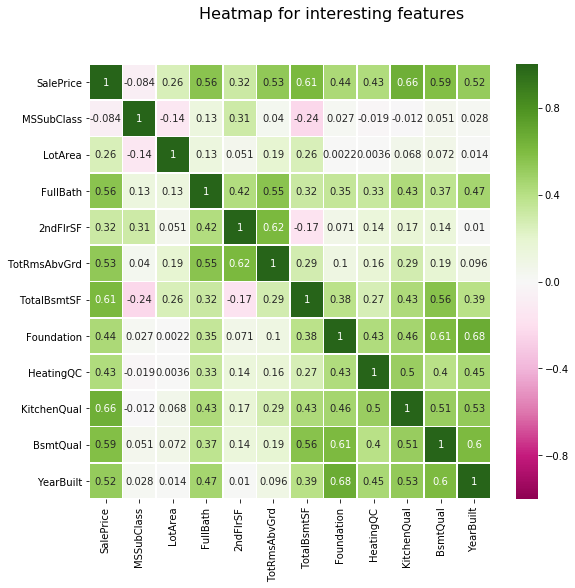

In [5]:
pd.set_option('mode.chained_assignment', None)

plt.figure(figsize=(9,8))
plt.suptitle('Heatmap for interesting features', fontsize=16)

Interestingcolumns = ['SalePrice', 'MSSubClass','LotArea', 'FullBath',
                      '2ndFlrSF','TotRmsAbvGrd', 'TotalBsmtSF', 'Foundation',
                      'HeatingQC', 'KitchenQual', 'BsmtQual','YearBuilt']

QualityMapping = {'NA' : 0, 'Po' : 1, 'Fa' : 2,'TA' : 3,'Gd' : 4, 'Ex': 5}
FoundationMapping = {'Wood' : 0, 'Stone' : 1, 'Slab' : 2, 'BrkTil' : 3,
                     'CBlock' : 4, 'PConc': 5}

q1_train = train[Interestingcolumns]
q1_train['Foundation'].fillna('NA', inplace=True)
q1_train['Foundation']=q1_train['Foundation'].apply(lambda x: FoundationMapping[x])

for col in ['HeatingQC', 'KitchenQual', 'BsmtQual']:
    q1_train[col].fillna('NA', inplace=True)
    q1_train[col] = q1_train[col].apply(lambda x: QualityMapping[x])

corr = pd.DataFrame()
for a in Interestingcolumns:
    for b in Interestingcolumns:
        corr.loc[a, b] = q1_train.corr().loc[a, b]

heatmap = sb.heatmap(corr, cmap="PiYG", annot=True, linewidths=.8, vmin=-1, vmax=1)

plt.show()

The most positive correlations are between

a) YearBuilt and Foundation type : **0.68**

b) KitchenQuality and Sales Price : **0.66**


The least correlation is between MSSubClass (the type of dwelling)


and TotalBsmtSF (Total square feet of basement area) : **-0.24**


## Part 2 - Informative Plots

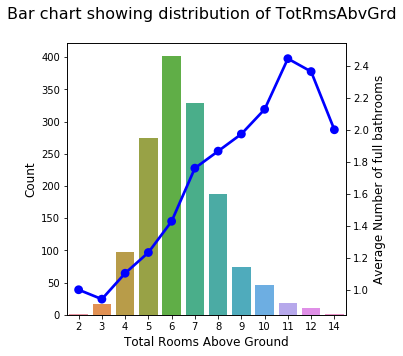

In [6]:
plt.figure(figsize=(5,5))
plt.suptitle('Bar chart showing distribution of TotRmsAbvGrd', fontsize=16)
q2a = train.loc[:, ['TotRmsAbvGrd', 'SalePrice', 'FullBath']]
totalRooms = []
roomMean = []
bathsMean = []

for rooms in q2a.TotRmsAbvGrd.unique():
    q2a_ = q2a[q2a['TotRmsAbvGrd'] == rooms]
    totalRooms.append(rooms)
    roomMean.append(q2a_['SalePrice'].mean())
    bathsMean.append(q2a_['FullBath'].mean())
    
q2a_ = pd.DataFrame()
q2a_['rooms']  = totalRooms
q2a_['roomMean']  = roomMean
q2a_['bathMean'] = bathsMean

cp1 = sb.countplot(train.TotRmsAbvGrd)
lp1 = cp1.twinx()
lp1 = sb.pointplot(y="bathMean", x="rooms", data=q2a_, color="blue")
cp1.set_xlabel("Total Rooms Above Ground", fontsize=12)
cp1.set_ylabel("Count", fontsize=12)
lp1.set_ylabel("Average Number of full bathrooms", fontsize=12)
plt.show()





* Most of the houses have 3 bedrooms. Therefore, it is expected that most of them

will have at least 6 rooms counting the kitchen, living room and dining room.

Please note that the bathrooms were not taken in consideration for this variable.   
* The subplots above show the expected trend. There is a linear correlation

between No of Rooms and Sales Price (except few outliers), and no of rooms and 

number of bathrooms in a house.

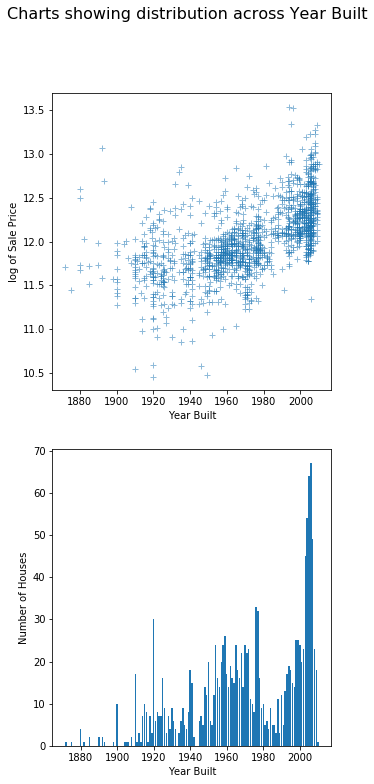

In [7]:
plt.figure(figsize=(5,12))
grid = plt.GridSpec(2, 1, wspace=0.2, hspace=0.2)
plt.suptitle('Charts showing distribution across Year Built', fontsize=16)

plt.subplot(grid[0, 0])
plt.plot(train.YearBuilt, np.log(train.SalePrice) ,'+', alpha = 0.5)
plt.xlabel("Year Built")
plt.ylabel("log of Sale Price")

plt.subplot(grid[1, 0])
q2a_t1 = train['YearBuilt'].value_counts().reset_index(name='YearBuilt')
q2a_t1.columns = ['YearBuilt', 'Count']
plt.xlabel("Year Built")
plt.ylabel("Number of Houses")
plt.bar(q2a_t1["YearBuilt"], q2a_t1["Count"])

plt.show()



* The greater part of the houses in the dataset was built in the last 10 years.

* Older houses from the beginning of the last century was sold at high prices.

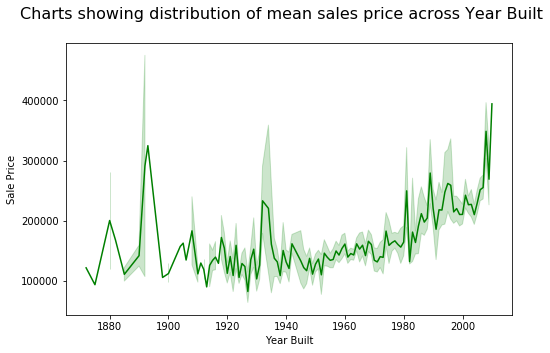

In [8]:
plt.figure(figsize=(8,5))
plt.suptitle('Charts showing distribution of mean sales price across Year Built'
, fontsize=16)
q2b = train[['YearBuilt','SalePrice']]
q2b.groupby('YearBuilt', as_index=False)['SalePrice'].mean()
sb.lineplot(y='SalePrice', x='YearBuilt', data=q2b, color='green')
plt.xlabel("Year Built")
plt.ylabel("Sale Price")
plt.show()

 There has been a noticable increase in the mean price of the houses (Even 

though the number of house have increased)through out the time period.

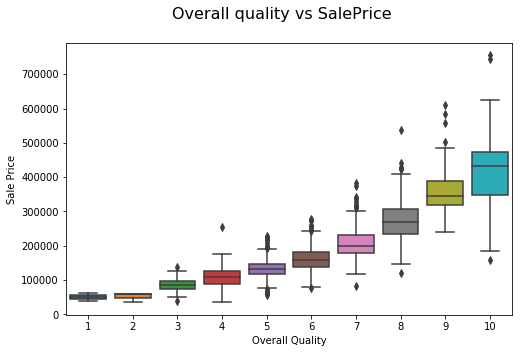

In [9]:
plt.figure(figsize=(8,5))
sb.boxplot(x='OverallQual', y='SalePrice', data=train[['SalePrice',
                                                       'OverallQual']])
plt.suptitle('Overall quality vs SalePrice', fontsize=16)
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.show()

It is the overall finish of the house (including material and make) on a scale

from 1 (very poor) to 10 (very excellent). There is a strong positive 

correlation as seen from the plot. There are a few outliers present as seen 

from the plot.

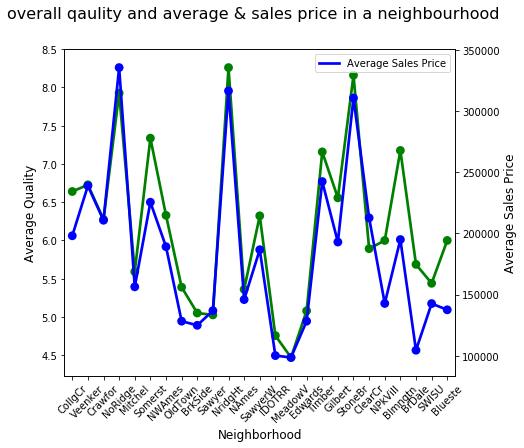

In [10]:
plt.figure(figsize=(7,6))
plt.suptitle('overall qaulity and average & sales price in a neighbourhood',
             fontsize=16)

q2a = train.loc[:, ['OverallQual', 'SalePrice', 'Neighborhood']]
no = []
avgSalePrice = []
neighborhood = []
avgQuality = []

for n in q2a.Neighborhood.unique():
    q2a_ = q2a[q2a['Neighborhood'] == n]
    neighborhood.append(n)
    no.append(len(q2a_.index))
    avgSalePrice.append(q2a_['SalePrice'].mean())
    avgQuality.append(q2a_['OverallQual'].mean())
    
q2a_ = pd.DataFrame()
q2a_['no']  = no
q2a_['avgSalePrice']  = avgSalePrice
q2a_['neighborhood'] = neighborhood
q2a_['avgQuality'] = avgQuality

cp1 = sb.pointplot(y="avgQuality", x="neighborhood", data=q2a_, color="green",
                   labels="Average Quality")
lp1 = cp1.twinx()
lp1 = sb.pointplot(y="avgSalePrice", x="neighborhood", data=q2a_, color="blue",
                   labels="Average Sales Price")

cp1.set_xticklabels(q2a_['neighborhood'], rotation=45)
cp1.set_xlabel("Total Rooms Above Ground", fontsize=12)
cp1.set_ylabel("Count", fontsize=12)

cp1.set_xlabel("Neighborhood", fontsize=12)
cp1.set_ylabel("Average Quality", fontsize=12)
lp1.set_ylabel("Average Sales Price", fontsize=12)

plt.legend(labels=['Average Sales Price'])
plt.show()

The Average Sale price and average quality of Neighborhood goes hand in hand justifying that they have a very high correlation.

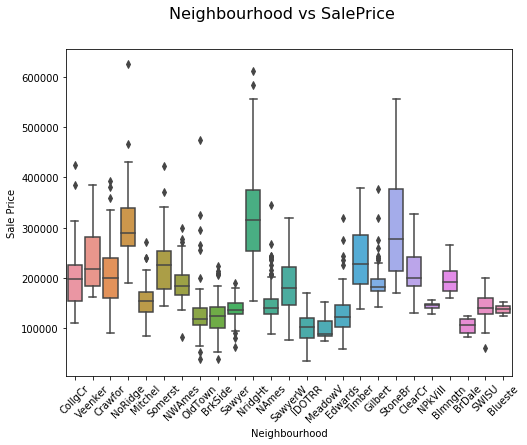

In [11]:
plt.figure(figsize=(8,6))
sb1 = sb.boxplot(y='SalePrice', x='Neighborhood',
                 data=train[train.SalePrice < 700000])
plt.suptitle('Neighbourhood vs SalePrice', fontsize=16)
plt.xlabel("Neighbourhood")
plt.xticks(rotation=45)
plt.ylabel("Sale Price")
plt.show()

Boxplot depicting 

# Data Exploration

**Feature extraction preparation will help in the next questions. (Q3-Q10)**

### Check for Missing values

In [12]:
# The missing values in the dataset (More than 40% data missing)
model = train.copy()
model_test = test.copy()
missing_values = train.isnull().sum()
missing_values_percent = 100 * missing_values / len(train)
missing_values_table = pd.concat([missing_values, missing_values_percent], axis=1)
missing_values_table = missing_values_table.rename(columns =
                                                   {0 : 'Missing Values', 1 : '%'})
missing_values_table = missing_values_table[
missing_values_table.iloc[:,1] > 40].sort_values('%', ascending=False).round(1)

model = model.drop(
    ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'Utilities', 'Street'], axis=1)
model_test = model_test.drop(
    ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'Utilities', 'Street'], axis=1)
missing_values_table

,Missing Values,%
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3


Dropping columns **PoolQC**, **MiscFeature**, **Alley** and **Fence** right away because 50% of the data has null values.

Dropping **Utlities** and **Street** columns because they have 1 and 6 alternate values respectively.

### Droping outliers

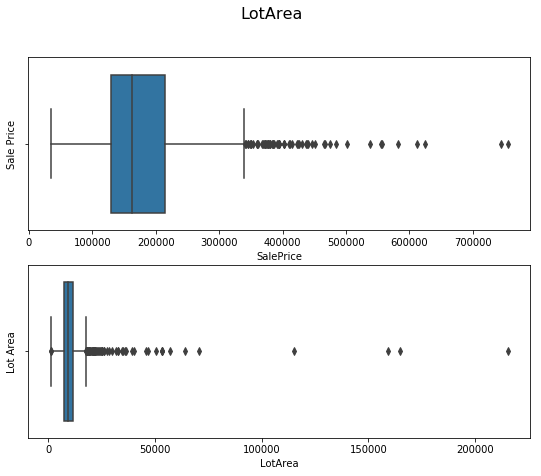

In [13]:
model = model[model.SalePrice < 700000]
model = model[model.LotArea < 100000]

plt.figure(figsize=(9,7))
grid = plt.GridSpec(2, 1, wspace=0.2, hspace=0.2)
plt.suptitle('Outliers wrt Sales Price and Lot Area', fontsize=16)

plt.subplot(grid[0, 0])

sb.boxplot(x='SalePrice', data=train[['SalePrice']])
plt.suptitle('SalePrice', fontsize=16)
plt.ylabel("Sale Price")

plt.subplot(grid[1, 0])
sb.boxplot(x='LotArea', data=train[['LotArea']])
plt.suptitle('LotArea', fontsize=16)
plt.ylabel("Lot Area")

plt.show()

Using the seaborn boxplot method we notice points outside the interquartile range as outliers. As is evidenced in the boxplot, I have dropped the two homes that sold for more than $700k.

### Changing rating strings to numericals

In [0]:
qualityBasedColumnsOutof6 = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                             'HeatingQC','KitchenQual', 'GarageQual',
                             'GarageCond', 'FireplaceQu']

QualityMappingOutof6 = {'NA' : 0, 'Po' : 1, 'Fa' : 2,'TA' : 3,'Gd' : 4, 'Ex': 5}

for col in qualityBasedColumnsOutof6:
    model[col].fillna('NA', inplace=True)
    model[col] = model[col].apply(lambda x: QualityMappingOutof6[x])
    model_test[col].fillna('NA', inplace=True)
    model_test[col] = model_test[col].apply(lambda x: QualityMappingOutof6[x])
    

### Handling the null values for numeric features by replacing null with the mean value

In [15]:
print('Train Table\n')
for col in model.select_dtypes(include=[np.number]).columns.tolist():
    nullCount = model[col].isna().sum()
    if nullCount > 0:
        colMean = model[col].mean()
        model[col].fillna(colMean, inplace=True)
        print (col  + ' has ' + str(nullCount) +
               ' null values. Replacing them with ' + str(colMean))
        
print('\nTest Table\n')
for col in model_test.select_dtypes(include=[np.number]).columns.tolist():
    nullCount = model_test[col].isna().sum()
    if nullCount > 0:
        colMean = model_test[col].mean()
        model_test[col].fillna(colMean, inplace=True)
        print (col  + ' has ' + str(nullCount) +
               ' null values. Replacing them with ' + str(colMean))

Train Table

LotFrontage has 256 null values. Replacing them with 69.87979966611019
MasVnrArea has 8 null values. Replacing them with 102.7372060857538
GarageYrBlt has 81 null values. Replacing them with 1978.522214129643

Test Table

LotFrontage has 227 null values. Replacing them with 68.58035714285714
MasVnrArea has 15 null values. Replacing them with 100.70914127423822
BsmtFinSF1 has 1 null values. Replacing them with 439.2037037037037
BsmtFinSF2 has 1 null values. Replacing them with 52.61934156378601
BsmtUnfSF has 1 null values. Replacing them with 554.2949245541838
TotalBsmtSF has 1 null values. Replacing them with 1046.1179698216736
BsmtFullBath has 2 null values. Replacing them with 0.4344543582704187
BsmtHalfBath has 2 null values. Replacing them with 0.06520247083047358
GarageYrBlt has 78 null values. Replacing them with 1977.7212165097756
GarageCars has 1 null values. Replacing them with 1.7661179698216736
GarageArea has 1 null values. Replacing them with 472.76886145404666

### Handling the null values for Categorical features by replacing null with the mode

In [16]:
print('Train Table\n')
for col in model.select_dtypes(exclude=["number","bool_"]).columns.tolist():
    nullCount = model[col].isna().sum()
    if nullCount > 0:
        colMode = model[col].mode()[0]
        model[col].fillna(colMode, inplace=True)
        print (col  + ' has ' + str(nullCount)
        + ' null values. Replacing them with ' + str(colMode))

print('Test Table\n')
for col in model_test.select_dtypes(exclude=["number","bool_"]).columns.tolist():
    nullCount = model_test[col].isna().sum()
    if nullCount > 0:
        colMode = model_test[col].mode()[0]
        model_test[col].fillna(colMode, inplace=True)
        print (col  + ' has ' + str(nullCount)
        + ' null values. Replacing them with ' + str(colMode))

Train Table

MasVnrType has 8 null values. Replacing them with None
BsmtExposure has 38 null values. Replacing them with No
BsmtFinType1 has 37 null values. Replacing them with Unf
BsmtFinType2 has 38 null values. Replacing them with Unf
Electrical has 1 null values. Replacing them with SBrkr
GarageType has 81 null values. Replacing them with Attchd
GarageFinish has 81 null values. Replacing them with Unf
Test Table

MSZoning has 4 null values. Replacing them with RL
Exterior1st has 1 null values. Replacing them with VinylSd
Exterior2nd has 1 null values. Replacing them with VinylSd
MasVnrType has 16 null values. Replacing them with None
BsmtExposure has 44 null values. Replacing them with No
BsmtFinType1 has 42 null values. Replacing them with GLQ
BsmtFinType2 has 42 null values. Replacing them with Unf
Functional has 2 null values. Replacing them with Typ
GarageType has 76 null values. Replacing them with Attchd
GarageFinish has 78 null values. Replacing them with Unf
SaleType has 1 

### Neighbourhood values to numericals

| Count | Average Selling Price | Neighbourhood | Average Quality Rating |
|-------|-----------------------|---------------|------------------------|
| 17    | 98576.5               | MeadowV       | 4.47                   |
| 37    | 100123.8              | IDOTRR        | 4.76                   |
| 74    | 136793.1              | Sawyer        | 5.03                   |
| 58    | 124834.1              | BrkSide       | 5.05                   |
| 100   | 128219.7              | Edwards       | 5.08                   |
| 225   | 145847.1              | NAmes         | 5.36                   |
| 113   | 128225.3              | OldTown       | 5.39                   |
| 25    | 142591.4              | SWISU         | 5.44                   |
| 49    | 156270.1              | Mitchel       | 5.59                   |
| 16    | 104493.8              | BrDale        | 5.69                   |
| 28    | 212565.4              | ClearCr       | 5.89                   |
| 2     | 137500.0              | Blueste       | 6.00                   |
| 9     | 142694.4              | NPkVill       | 6.00                   |
| 51    | 210624.7              | Crawfor       | 6.27                   |
| 59    | 186555.8              | SawyerW       | 6.32                   |
| 73    | 189050.1              | NWAmes        | 6.33                   |
| 79    | 192854.5              | Gilbert       | 6.56                   |
| 150   | 197965.8              | CollgCr       | 6.64                   |
| 11    | 238772.7              | Veenker       | 6.73                   |
| 38    | 242247.4              | Timber        | 7.16                   |
| 17    | 194870.9              | Blmngtn       | 7.18                   |
| 86    | 225379.8              | Somerst       | 7.34                   |
| 41    | 335295.3              | NoRidge       | 7.93                   |
| 25    | 310499.0              | StoneBr       | 8.16                   |
| 77    | 316270.6              | NridgHt       | 8.26                   |


In [0]:
neighbourhoodMapping = {'MeadowV' : 0, 'IDOTRR' : 1, 'Sawyer' : 2,'BrkSide' : 2,
                        'Edwards' : 2, 'NAmes': 3,
                       'OldTown' : 3, 'SWISU' : 3, 'Mitchel' : 4,'BrDale' : 2,
                        'ClearCr' : 5, 'Blueste': 3,
                       'NPkVill' : 3, 'Crawfor' : 6, 'SawyerW' : 5,'NWAmes' : 5,
                        'Gilbert' : 5, 'CollgCr': 5,
                       'Veenker' : 6, 'Timber' : 7, 'Blmngtn' : 6,'Somerst' : 7,
                        'NoRidge' : 9, 'StoneBr': 8,
                       'NridgHt' : 8}
model['Neighborhood'] = model['Neighborhood'].apply(
    lambda x: neighbourhoodMapping[x])
model_test['Neighborhood'] = model_test['Neighborhood'].apply(
    lambda x: neighbourhoodMapping[x])

### Data Analysis and Cleaning for some categorical features

**LandContour** has Lvl mostly. Hence adding a new column **LandLeveled** and dropping LandContour.

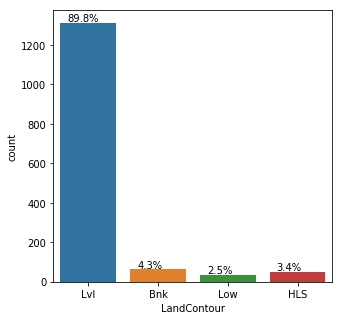

In [18]:
plt.figure(figsize=(5,5))
ax = sb.countplot(x='LandContour', data=train)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/1460), (p.get_x()+0.1,
                                                                p.get_height()+7))
plt.show()

In [0]:
model['LandLeveled'] = train['LandContour'].apply(lambda x: 1 if x=="Lvl"
else 0)
model = model.drop(['LandContour'], axis=1)
model_test['LandLeveled'] = test['LandContour'].apply(lambda x: 1 if x=="Lvl"
else 0)
model_test = model_test.drop(['LandContour'], axis=1)

**LandSlope** has Gtl mostly. Hence adding a new column **GentleSloped** and dropping LandSlope.

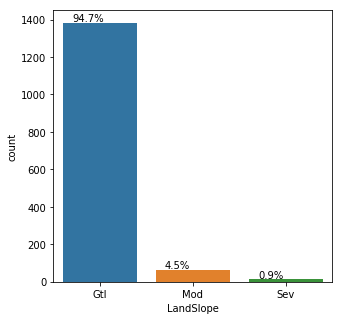

In [20]:
plt.figure(figsize=(5,5))
ax = sb.countplot(x='LandSlope', data=train)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/1460), (p.get_x()+0.1,
                                                                p.get_height()+7))
plt.show()

In [0]:
model['GentleSloped'] = train['LandSlope'].apply(lambda x: 1 if x=="Gtl" else 0)
model = model.drop(['LandSlope'], axis=1)
model_test['GentleSloped'] = test['LandSlope'].apply(lambda x: 1 if x=="Lvl" else 0)
model_test = model_test.drop(['LandSlope'], axis=1)

**PavedDrive** has Y mostly. Hence adding a new column **hasPavedDrive** and

dropping LandSlope.

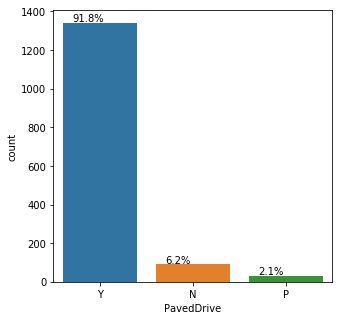

In [22]:
plt.figure(figsize=(5,5))
ax = sb.countplot(x='PavedDrive', data=train)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/1460),
                    (p.get_x()+0.1, p.get_height()+7))
plt.show()

In [0]:
model['hasPavedDrive'] = train['PavedDrive'].apply(lambda x: 1 if x=="Y" else 0)
model = model.drop(['PavedDrive'], axis=1)
model_test['hasPavedDrive'] = test['PavedDrive'].apply(
    lambda x: 1 if x=="Y" else 0)
model_test = model_test.drop(['PavedDrive'], axis=1)

**GarageType's** Attchd and Biltin can be grouped together as inHouse

hasAttachedGarage. Hence adding a new column **hasAttachedGarage** and

dropping GarageType.

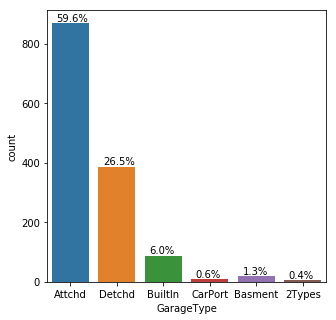

In [24]:
plt.figure(figsize=(5,5))
ax = sb.countplot(x='GarageType', data=train)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/1460),
                    (p.get_x()+0.1, p.get_height()+7))
plt.show()

In [0]:
model['hasAttachedGarage'] = train['GarageType'].apply(
    lambda x: 1if (x=="Attchd" or x=="BuiltIn") else 0)
model['hasDetachedGarage'] = train['GarageType'].apply(
    lambda x: 1 if (x!="Attchd" and x!="BuiltIn") else 0)
model = model.drop(['GarageType'], axis=1)

In [0]:
model_test['hasAttachedGarage'] = test['GarageType'].apply(
    lambda x: 1 if (x=="Attchd" or x=="BuiltIn") else 0)
model_test['hasDetachedGarage'] = train['GarageType'].apply(
    lambda x: 1 if (x!="Attchd" and x!="BuiltIn") else 0)
model_test = model_test.drop(['GarageType'], axis=1)

**BsmtFinType1** and **BsmtFinType2** values are replaced with numericals.

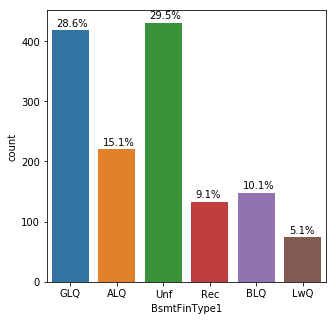

In [27]:
plt.figure(figsize=(5,5))
ax = sb.countplot(x='BsmtFinType1', data=train)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/1460),
                    (p.get_x()+0.1, p.get_height()+7))
plt.show()

In [0]:
BsmtFinType = {'Unf' : 1, 'LwQ' : 2, 'BLQ' : 3,'Rec' : 4,'ALQ' : 5, 'GLQ': 6}
model['BsmtFinType1'] = model['BsmtFinType1'].apply(lambda x: BsmtFinType[x])
model_test['BsmtFinType1'] = model_test['BsmtFinType1'].apply(
    lambda x: BsmtFinType[x])
model['BsmtFinType2'] = model['BsmtFinType2'].apply(lambda x: BsmtFinType[x])
model_test['BsmtFinType2'] = model_test['BsmtFinType2'].apply(
    lambda x: BsmtFinType[x])

**Electrical** values are replaced with numericals.

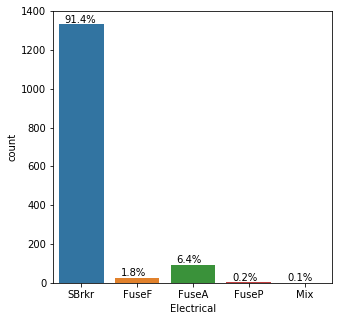

In [29]:
plt.figure(figsize=(5,5))
ax = sb.countplot(x='Electrical', data=train)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/1460),
                    (p.get_x()+0.1, p.get_height()+7))
plt.show()

In [0]:
ElectricalType = {'Mix' : 1, 'FuseP' : 2, 'FuseF' : 2,'FuseA' : 2,'SBrkr' : 3}
model['Electrical'] = model['Electrical'].apply(lambda x: ElectricalType[x])
model_test['Electrical'] = model_test['Electrical'].apply(
    lambda x: ElectricalType[x])

**BsmtExposure** values are replaced with numericals.

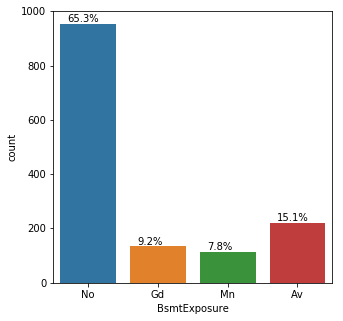

In [31]:
plt.figure(figsize=(5,5))
ax = sb.countplot(x='BsmtExposure', data=train)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/1460),
                    (p.get_x()+0.1, p.get_height()+7))
plt.show()

In [0]:
BsmtExposureType = {'No' : 1, 'Mn' : 2, 'Av' : 3,'Gd' : 4}
model['BsmtExposure'] = model['BsmtExposure'].apply(
    lambda x: BsmtExposureType[x])
model_test['BsmtExposure'] = model_test['BsmtExposure'].apply(
    lambda x: BsmtExposureType[x])

**Functional** values are replaced with numericals.

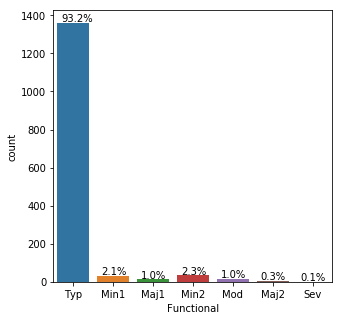

In [33]:
plt.figure(figsize=(5,5))
ax = sb.countplot(x='Functional', data=train)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/1460),
                    (p.get_x()+0.1, p.get_height()+7))
plt.show()

In [0]:
FunctionalType = {'Maj2' : 1, 'Sev' : 2, 'Min2' : 3,'Min1' : 4,
                  'Maj1' : 5, 'Mod' : 6, 'Typ' : 7}
model['Functional'] = model['Functional'].apply(lambda x: FunctionalType[x])
model_test['Functional'] = model_test['Functional'].apply(
    lambda x: FunctionalType[x])

**GarageFinish** values are replaced with numericals.

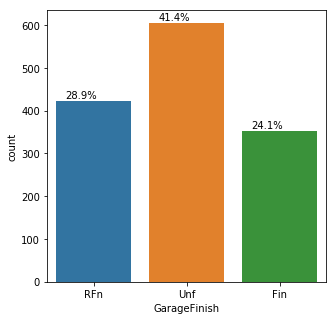

In [35]:
plt.figure(figsize=(5,5))
ax = sb.countplot(x='GarageFinish', data=train)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/1460),
                    (p.get_x()+0.1, p.get_height()+7))
plt.show()

In [0]:
GarageFinishType = {'Unf' : 1, 'RFn' : 2, 'Fin' : 3}
model['GarageFinish'] = model['GarageFinish'].apply(lambda x: GarageFinishType[x])
model_test['GarageFinish'] = model_test['GarageFinish'].apply(
    lambda x: GarageFinishType[x])

**Condition1** and **condition2** values are replaced with numericals.

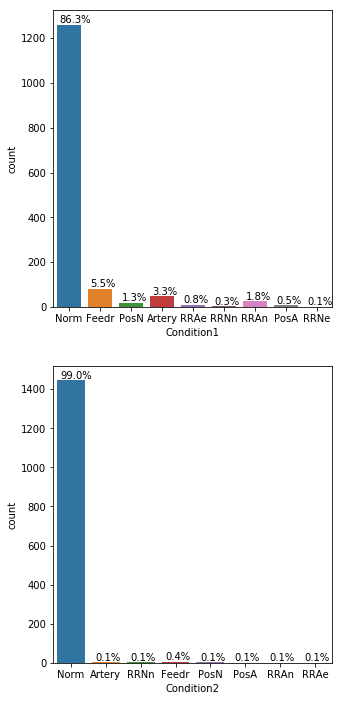

In [37]:
plt.figure(figsize=(5,12))
grid = plt.GridSpec(2, 1, wspace=0.5, hspace=0.2)
plt.subplot(grid[0,0])
ax = sb.countplot(x='Condition1', data=train)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/1460),
                    (p.get_x()+0.1, p.get_height()+7))
plt.subplot(grid[1,0])
ax1 = sb.countplot(x='Condition2', data=train)
for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format(100*p.get_height()/1460),
                     (p.get_x()+0.1, p.get_height()+7))
plt.show()

In [0]:
ConditionType = {'Feedr' : 1, 'Artery' : 1,'RRAe': 2, 'RRAn' : 2, 'RRNe' : 2, 'RRNn' : 2,
                    'Norm' : 3, 'PosA': 4, 'PosN' : 4}
model['Condition1'] = model['Condition1'].apply(lambda x: ConditionType[x])
model_test['Condition1'] = model_test['Condition1'].apply(lambda x: ConditionType[x])
model['Condition2'] = model['Condition2'].apply(lambda x: ConditionType[x])
model_test['Condition2'] = model_test['Condition2'].apply(lambda x: ConditionType[x])

**LotShape** & **LotConfig** values are replaced with numericals.

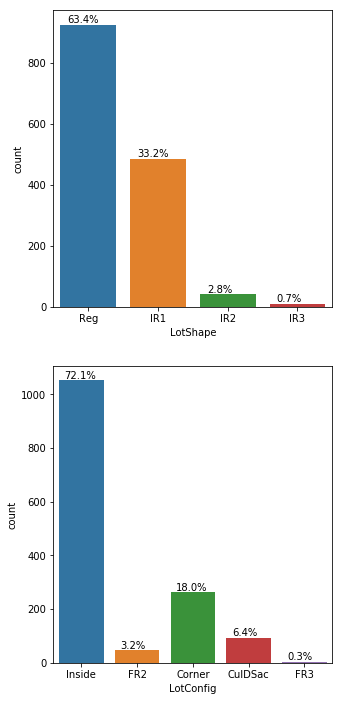

In [39]:
plt.figure(figsize=(5,12))
grid = plt.GridSpec(2, 1, wspace=0.5, hspace=0.2)
plt.subplot(grid[0,0])
ax = sb.countplot(x='LotShape', data=train)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/1460),
                    (p.get_x()+0.1, p.get_height()+7))
plt.subplot(grid[1,0])
ax1 = sb.countplot(x='LotConfig', data=train)
for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format(100*p.get_height()/1460),
                     (p.get_x()+0.1, p.get_height()+7))
plt.show()

In [0]:
LotShapeType = {'Reg' : 1,'IR1' : 2, 'IR2' : 3, 'IR3' : 4}
LotConfigType = {'Inside' : 1,'FR3' : 2, 'FR2' : 2, 'Corner' : 3, 'CulDSac' : 4}

model['LotShape'] = model['LotShape'].apply(lambda x: LotShapeType[x])
model_test['LotShape'] = model_test['LotShape'].apply(lambda x: LotShapeType[x])

model['LotConfig'] = model['LotConfig'].apply(lambda x: LotConfigType[x])
model_test['LotConfig'] = model_test['LotConfig'].apply(lambda x: LotConfigType[x])

**MasVnrType** values are replaced with numericals.

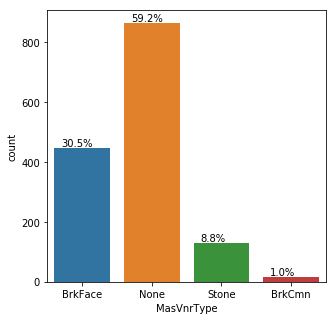

In [41]:
plt.figure(figsize=(5,5))
ax = sb.countplot(x='MasVnrType', data=train)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/1460),
                    (p.get_x()+0.1, p.get_height()+7))
plt.show()

In [0]:
MasVnrTypeType = {'None' : 0,'BrkCmn' : 1, 'Stone' : 2, 'BrkFace' : 3}
model['MasVnrType'] = model['MasVnrType'].apply(lambda x: MasVnrTypeType[x])
model_test['MasVnrType'] = model_test['MasVnrType'].apply(lambda x: MasVnrTypeType[x])

**MSZoning** values are replaced with numericals.

| MSZoning | Average Selling Price |
|-------|-----------------------|
| RL    | 189662.7             | 
| RM    | 126316.8              | 
| C     | 74528.0              | 
| FV    | 214014.0               | 
| RH    | 131558.3              | 

In [0]:
MSZoningType = {'C (all)' : 1,'RM' : 2, 'RH' : 3, 'RL' : 4, 'FV': 5 }
model['MSZoning'] = model['MSZoning'].apply(lambda x: MSZoningType[x])
model_test['MSZoning'] = model_test['MSZoning'].apply(lambda x: MSZoningType[x])

**BldgType** values are replaced with numericals.

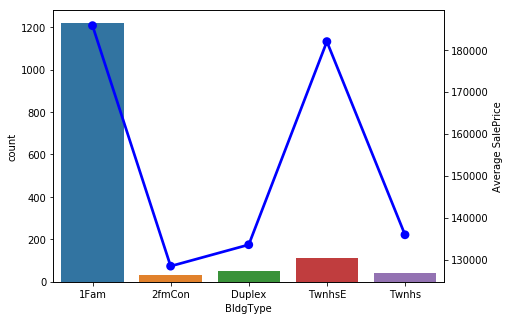

In [44]:
plt.figure(figsize=(7,5))

a = []
b = []
for x in train.BldgType.unique():
    q6a_ = train[train['BldgType'] == x]
    a.append(x)
    b.append(q6a_['SalePrice'].mean())
    
q6a_ = pd.DataFrame()
q6a_['a']  = a
q6a_['Average SalePrice']  = b
cp1 = sb.countplot(train.BldgType)
lp1 = cp1.twinx()
lp1 = sb.pointplot(y="Average SalePrice", x="a", data=q6a_, color="blue")
plt.show()

In [0]:
BldgTypeType = {'2fmCon' : 1,'Duplex' : 2, 'Twnhs' : 3, 'TwnhsE' : 4, '1Fam': 5 }
model['BldgType'] = model['BldgType'].apply(lambda x: BldgTypeType[x])
model_test['BldgType'] = model_test['BldgType'].apply(lambda x: BldgTypeType[x])

**HouseStyle** values are replaced with numericals.


In [0]:
HouseStyleType = {'1.5Unf' : 1,'SFoyer' : 1, '1.5Fin' : 1, 'SLvl' : 2,
                  '2.5Unf': 2, '1Story' : 2, '2.5Fin':3, '2Story':3}
model['HouseStyle'] = model['HouseStyle'].apply(lambda x: HouseStyleType[x])
model_test['HouseStyle'] = model_test['HouseStyle'].apply(
    lambda x: HouseStyleType[x])

**Foundation** values are replaced with numericals.

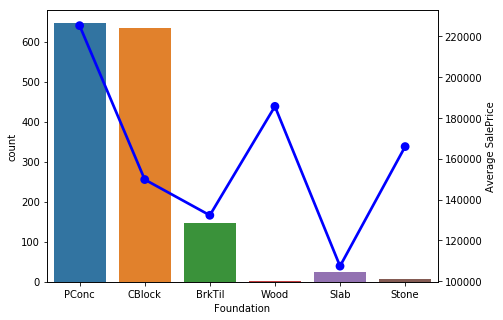

In [47]:
plt.figure(figsize=(7,5))
a = []
b = []
for x in train.Foundation.unique():
    q6a_ = train[train['Foundation'] == x]
    a.append(x)
    b.append(q6a_['SalePrice'].mean())
    
q6a_ = pd.DataFrame()
q6a_['a']  = a
q6a_['Average SalePrice']  = b
cp1 = sb.countplot(train.Foundation)
lp1 = cp1.twinx()
lp1 = sb.pointplot(y="Average SalePrice", x="a", data=q6a_, color="blue")
plt.show()

In [0]:
FoundationType = {'Wood': 1, 'Stone' : 1,'Slab' : 1, 'BrkTil' : 2,
                  'CBlock' : 2, 'PConc': 3}
model['Foundation'] = model['Foundation'].apply(lambda x: FoundationType[x])
model_test['Foundation'] = model_test['Foundation'].apply(
    lambda x: FoundationType[x])

## Part 3 - Handcrafted Scoring Function

In [0]:
train_copy = model.copy()
qualityBasedColumnsOutof10 = ['OverallQual', 'OverallCond']
qualityBasedColumnsOutof6 = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
                             'HeatingQC','KitchenQual', 'GarageQual', 'GarageCond']

amenitiesCols = ['GarageCars', 'BsmtFinType1',
                 'BsmtExposure', 'BldgType', 'HouseStyle']
otherFactors = ['YearBuilt', 'Neighborhood', 'MSZoning',
                'YearRemodAdd', 'YearBuilt', 'SalePrice']


# 8 * 5 (qualityBasedColumnsOutof6) + 20 (qualityBasedColumnsOutof10) +
# 8 (Neighbourhood) 5 MSZoning = 73 -> Maximum score you can get
def qualityScoringFunction(row):
    qualitySum = 0
    for col in qualityBasedColumnsOutof6:
        qualitySum += row[col]
    qualitySum += row['OverallQual'] * 0.5
    qualitySum += row['OverallCond'] * 1.5
    qualitySum += row['Neighborhood'] * 1.5
    qualitySum += row['MSZoning']
    return qualitySum/77.0 * 100

# TotRmsAbvGrd 2-14, GarageCars 0-4, BsmtFinType1 1-6, BsmtExposure 1-4,
# BldgType 1-5, HouseStyle 1-3
def amenitiesScoringFunction(row):
    amenitiesSum = 0
    for col in amenitiesCols:
        amenitiesSum += row[col]
    return amenitiesSum/36 * 100

# if Saleprice/LotArea is less, the house is more desirable (For a person with budget)
def costScoringFunction(row):
    return 100 - row['SalePrice']/row['LotArea']

# 1950 - Latest year when ant of the house was remodeled
# 
def builtYearScoringFunction(yr,yb):
    return (((yr - 1949)/60.0) * 100) * 0.5 + (((yb - 1872)/138.0) * 100) * 0.5

# Factors that can further be tuned as per requirements
qualityFactor = 0.5
builtYearFactor = 0.1
# costFactor = 0.2
amenitiesFactor = 0.2

qualityScore = []
builtYearScore = []
priceScore = []
amenitiesScore = []
overallScore = []

for index, row in model.iterrows():
    qs = qualityScoringFunction(row)
    # ps = costScoringFunction(row)
    ys = builtYearScoringFunction(row['YearRemodAdd'], row['YearBuilt'])
    ass = amenitiesScoringFunction(row)
    qualityScore.append(qs)
    #priceScore.append(ps)
    builtYearScore.append(ys)
    amenitiesScore.append(ass)
    overallScore.append(qualityFactor * qs + builtYearFactor * ys
                       + amenitiesFactor * ass)

train_copy = train_copy.assign(qualityScore=qualityScore)
#train_copy = train_copy.assign(priceScore=priceScore)
train_copy = train_copy.assign(builtYearScore=builtYearScore)
train_copy = train_copy.assign(amenitiesScore=amenitiesScore)
train_copy = train_copy.assign(overallScore=overallScore)

reqdCols = ['Id','qualityScore','builtYearScore',
        'amenitiesScore', 'overallScore']
reqdCols = reqdCols + qualityBasedColumnsOutof6 + qualityBasedColumnsOutof10 +\
amenitiesCols + otherFactors

**Ten Most Desirable Houses are:**

In [50]:
train_copy.loc[:, train_copy.columns.isin(reqdCols)]\
.sort_values('overallScore',ascending=False).head(10)

,Id,MSZoning,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageCars,GarageQual,GarageCond,SalePrice,qualityScore,builtYearScore,amenitiesScore,overallScore
591,592,4,8,5,3,10,5,2008,2008,5,3,5,3,4,6,5,5,3,3,3,451950,78.571429,98.442029,58.333333,60.796584
1243,1244,4,8,5,2,10,5,2006,2006,5,3,5,4,4,6,5,5,3,3,3,465000,79.870130,96.050725,55.555556,60.651249
1373,1374,4,9,5,2,10,5,2001,2002,5,3,5,3,4,6,5,5,3,3,3,466500,80.519481,90.905797,55.555556,60.461431
440,441,4,8,5,2,10,5,2008,2008,5,3,5,3,4,6,5,5,3,3,3,555000,78.571429,98.442029,55.555556,60.241028
389,390,4,8,5,3,10,5,2007,2008,5,3,5,3,3,6,5,5,3,3,3,426000,78.571429,98.079710,55.555556,60.204796
898,899,4,8,5,2,9,5,2009,2010,5,3,5,3,4,6,5,5,3,3,3,611657,77.922078,100.471014,55.555556,60.119252
994,995,4,8,5,2,10,5,2006,2007,5,3,5,3,4,6,5,5,3,3,3,337500,78.571429,96.884058,55.555556,60.085231
1442,1443,5,7,5,3,10,5,2008,2008,5,3,5,3,3,6,5,5,3,3,3,310000,77.922078,98.442029,55.555556,59.916353
1058,1059,4,8,5,3,9,5,2008,2008,5,3,5,3,3,6,5,5,3,3,3,335000,77.922078,98.442029,55.555556,59.916353
527,528,4,8,5,3,9,5,2008,2008,5,3,5,3,3,6,5,5,3,3,3,446261,77.922078,98.442029,55.555556,59.916353


**Ten least desirable houses as per the scoring function**

In [51]:
train_copy.loc[:, train_copy.columns.isin(reqdCols)]\
.sort_values('overallScore', ascending=True).head(10)

,Id,MSZoning,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageCars,GarageQual,GarageCond,SalePrice,qualityScore,builtYearScore,amenitiesScore,overallScore
705,706,2,1,1,3,4,5,1930,1950,2,2,0,0,1,1,2,2,0,0,0,55000,27.272727,21.847826,16.666667,19.154480
533,534,4,2,5,2,1,3,1946,1950,2,2,0,0,1,1,2,2,0,0,0,39300,25.974026,27.644928,25.000000,20.751506
88,89,1,1,5,1,3,2,1915,1982,2,2,3,2,1,1,3,2,0,0,0,85000,27.272727,43.079710,22.222222,22.388779
636,637,2,2,5,2,2,3,1936,1950,2,2,3,2,1,1,2,2,0,0,0,60000,30.519481,24.021739,25.000000,22.661914
375,376,4,2,5,2,1,1,1922,1950,2,2,2,1,4,3,4,2,0,0,0,61000,28.571429,18.949275,38.888889,23.958420
398,399,2,1,5,2,5,2,1920,1950,3,2,2,1,1,1,4,3,1,1,1,67000,33.766234,18.224638,27.777778,24.261136
39,40,4,2,2,2,4,5,1955,1955,3,3,0,0,1,1,3,2,0,0,0,82000,35.714286,35.072464,16.666667,24.697723
1325,1326,2,1,5,2,4,4,1922,1950,3,3,3,2,1,1,2,3,0,0,0,55000,35.714286,18.949275,25.000000,24.752070
1218,1219,2,2,5,1,4,5,1947,1950,3,3,0,0,1,1,4,3,0,0,0,80500,35.714286,28.007246,22.222222,25.102312
1011,1012,4,2,2,2,5,5,1965,1965,3,3,0,0,1,1,3,3,0,0,0,100000,37.662338,47.028986,16.666667,26.867401


Scoring function below uses Quality, Price and Year Built as factors to compute a score out of 100.

**Quality**:
OverallQual, OverallCond, ExterQual, ExterCond, BsmtQual, BsmtCond, HeatingQC,

KitchenQual, GarageQual, GarageCond and **Neighborhood**



**Year Remodeled (Year Built)** : Older the house, less desirable it is to 

live in it.



**Ameneties** Total Living Rooms, Bathrooms , GarageCars, BsmtFinType1,
                 BsmtExposure, BldgType, HouseStyle

## Part 4 - Pairwise Distance Function

#### Drop a few columns

In [0]:
columnsToDrop = ['Id','MasVnrType','MasVnrArea', '3SsnPorch', 'RoofStyle', 'RoofMatl',
                 'Exterior1st', 'Exterior2nd', 'Heating', 'CentralAir', 'SaleType', 'SaleCondition',
                'MiscVal', 'MoSold', 'YrSold']
similarityModel = model.copy()
similarityModel = similarityModel.drop(columnsToDrop, axis=1)

#### Change Sale Price to Sale price per SF using Lot Area

In [0]:
SalePricePerSF = []
for index, row in similarityModel.iterrows():
    SalePricePerSF.append(row['SalePrice']/row['LotArea'])
similarityModel = similarityModel.assign(SalePricePerSF=SalePricePerSF)

similarityModel = similarityModel.drop(['SalePrice'], axis=1)

#### Binning LotArea, 1stFlrSF, 2ndFlrSF, GrLivArea equally into 60 bins

In [0]:
colsWithCommonFactor60 = ['LotArea', '1stFlrSF', '2ndFlrSF', 'GrLivArea']
for col in colsWithCommonFactor60:
    similarityModel[col + 'Rank'] = similarityModel[col].rank(method='first')
    similarityModel[col + 'Bin'] = pd.qcut(similarityModel[col + 'Rank'].values, 60).codes
    similarityModel = similarityModel.drop([col + 'Rank', col], axis=1)

#### Binning LotArea, 1stFlrSF, 2ndFlrSF, GrLivArea equally into 60 bins

In [0]:
colsWithCommonFactor20 = ['BsmtFinSF1', 'TotalBsmtSF', 'BsmtUnfSF', 'GarageArea']
for col in colsWithCommonFactor20:
    similarityModel[col + 'Rank'] = similarityModel[col].rank(method='first')
    similarityModel[col + 'Bin'] = pd.qcut(similarityModel[col + 'Rank'].values, 20).codes
    similarityModel = similarityModel.drop([col + 'Rank', col], axis=1)

#### Binning WoodDeckS, OpenPorchSF, EnclosedPorch, LotFrontage into 10 bins

In [0]:
colsWithCommonFactor10 = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'LotFrontage']
for col in colsWithCommonFactor10:
    similarityModel[col + 'Rank'] = similarityModel[col].rank(method='first')
    similarityModel[col + 'Bin'] = pd.qcut(similarityModel[col + 'Rank'].values, 10).codes
    similarityModel = similarityModel.drop([col + 'Rank', col], axis=1)

In [57]:
similarityModel.head(3)

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,HeatingQC,Electrical,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,ScreenPorch,PoolArea,LandLeveled,GentleSloped,hasPavedDrive,hasAttachedGarage,hasDetachedGarage,SalePricePerSF,LotAreaBin,1stFlrSFBin,2ndFlrSFBin,GrLivAreaBin,BsmtFinSF1Bin,TotalBsmtSFBin,BsmtUnfSFBin,GarageAreaBin,WoodDeckSFBin,OpenPorchSFBin,EnclosedPorchBin,LotFrontageBin
0,60,4,1,1,5,3,3,5,3,7,5,2003,2003,4,3,3,4,3,1,6,1,0,5,3,0,1,0,2,1,3,1,4,8,7,0,0,2003.0,2,2,3,3,0,0,1,1,1,1,0,24.674556,20,12,50,42,14,6,3,13,0,7,0,3
1,20,4,1,2,6,1,3,5,2,6,8,1976,1976,3,3,2,4,3,4,5,1,0,5,3,0,0,1,2,0,3,1,3,6,7,1,3,1976.0,2,2,3,3,0,0,1,1,1,1,0,18.906250,31,39,0,21,17,14,6,9,9,0,0,7
2,60,4,2,1,5,3,3,5,3,7,5,2001,2002,4,3,3,4,3,2,6,1,0,5,3,0,1,0,2,1,3,1,4,6,7,1,3,2001.0,2,2,3,3,0,0,1,1,1,1,0,19.866667,43,18,50,45,11,8,9,15,0,6,0,3


#### Creating a matrix consisting of Euclidean distances 

between the different rows of the similarityModel dataset. Most of the

parameters are reduced to smaller numbers which will return a good metric.

In [0]:
eucMatrix = sc.spatial.distance.cdist(similarityModel, similarityModel,
                                      metric='euclidean')
eucMatrixDF = pd.DataFrame(eucMatrix)

In [59]:
eucMatrixDF.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235,1236,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333,1334,1335,1336,1337,1338,1339,1340,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448,1449,1450,1451,1452,1453
0,0.000000,88.894732,26.002227,97.407893,46.054559,47.047987,80.126710,68.914969,119.364551,178.767841,102.381278,41.402131,206.891646,81.501215,108.240629,102.331065,97.069074,97.968405,80.831186,105.936504,50.012050,134.448984,83.205379,99.578841,674.075653,87.249067,494.635654,83.059863,108.443822,147.467363,134.962024,93.529461,80.432796,110.850467,90.000747,47.473241,80.877550,102.300809,102.772302,102.549190,99.017030,113.497561,120.953666,498.800167,517.065751,93.698278,205.121366,82.095755,159.951963,98.175361,42.093971,375.965435,719.091559,97.275621,102.755184,102.927616,110.723627,32.967342,58.452465,94.194956,79.432040,116.937393,88.981429,103.193110,25.545855,39.219619,104.724763,77.415350,124.661488,101.493646,102.685177,80.394404,292.344605,373.212531,138.742638,142.464272,110.634268,96.027811,98.363606,111.359272,262.708666,87.897944,79.066097,101.470028,35.102902,59.025271,37.461028,108.676850,525.078533,79.086945,118.674179,104.095841,138.858444,217.237046,16.141212,30.328623,77.785799,102.298365,149.634066,100.948699,86.882219,40.416687,83.669882,78.024601,214.361813,30.396850,148.086567,208.672799,94.901930,95.448139,84.463768,31.513471,173.130081,878.181457,176.450098,107.865244,678.330672,75.083024,61.582441,26.888892,95.661761,97.538692,168.695521,87.291283,93.496123,286.327227,98.897364,116.179442,69.087536,90.345590,78.839845,35.287677,90.106779,73.322423,94.697828,99.202337,97.642429,85.141911,19.531589,39.729827,93.954564,81.225059,77.310713,76.859366,101.176313,108.185468,124.962057,27.214009,77.289536,114.995656,89.555870,84.288524,70.001211,1085.031710,145.867635,109.163239,117.913567,37.575744,36.167264,57.459565,82.487749,57.357006,79.352126,98.326502,117.072908,235.453954,788.256961,50.841780,21.209356,95.791035,537.824150,114.134423,241.062000,388.351010,225.413221,113.429658,196.240203,450

#### Defining a method that inputs 2 numbers and prints out the similarity as percentage

The method divides the columns of house 1 into 20 bins and finds the value of 

house 2 in one of them to print out similarity number as a factor of 5.

Most similar houses will have larger similarity.

In [0]:
def compareTwoHouses(id1,id2):
    if (id1-1 == id2-1):
        print('100% match! Duh!')
        return
    compareHouses = pd.DataFrame()
    compareHouses['houseRanks'] = eucMatrixDF[id1-1].rank(method='first')
    compareHouses['HouseBin'] = pd.qcut(compareHouses['houseRanks'].values, 20)
    i = 100
    for row in compareHouses['HouseBin'].value_counts(sort=False).index:
        i = i-5
        if (eucMatrixDF[id1-1][id2-1] in row):
            print ('House ID#' + str(id1) + ' and #ID' + str(id2) + ' have '
            + str(i) + '% similarity!')

#### Examples

Consider the following examples. The function seems to work fine.

In [61]:
compareTwoHouses(1,3)

House ID#1 and #ID3 have 95% similarity!


In [62]:
compareTwoHouses(1,1453)

House ID#1 and #ID1453 have 25% similarity!


In [63]:
train[train['Id'] == 1]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [64]:
train[train['Id'] == 3]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [65]:
train[train['Id'] == 1453]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000


Taking a few examples has led to a conclusion that the scoring function gives

good results.

## Part 5 - Clustering

In [0]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [67]:
# Dropping Neighborhood
similarityModel = similarityModel.drop('Neighborhood', axis=1)
similarityModel.head(2)

,MSSubClass,MSZoning,LotShape,LotConfig,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF2,HeatingQC,Electrical,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,ScreenPorch,PoolArea,LandLeveled,GentleSloped,hasPavedDrive,hasAttachedGarage,hasDetachedGarage,SalePricePerSF,LotAreaBin,1stFlrSFBin,2ndFlrSFBin,GrLivAreaBin,BsmtFinSF1Bin,TotalBsmtSFBin,BsmtUnfSFBin,GarageAreaBin,WoodDeckSFBin,OpenPorchSFBin,EnclosedPorchBin,LotFrontageBin
0,60,4,1,1,3,3,5,3,7,5,2003,2003,4,3,3,4,3,1,6,1,0,5,3,0,1,0,2,1,3,1,4,8,7,0,0,2003.0,2,2,3,3,0,0,1,1,1,1,0,24.674556,20,12,50,42,14,6,3,13,0,7,0,3
1,20,4,1,2,1,3,5,2,6,8,1976,1976,3,3,2,4,3,4,5,1,0,5,3,0,0,1,2,0,3,1,3,6,7,1,3,1976.0,2,2,3,3,0,0,1,1,1,1,0,18.906250,31,39,0,21,17,14,6,9,9,0,0,7


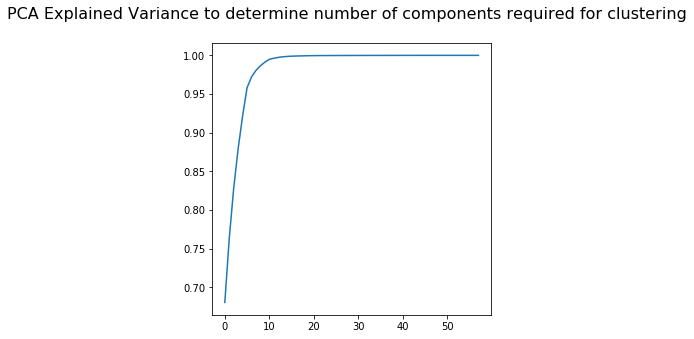

In [68]:
pca = PCA(n_components=58).fit(similarityModel)
evr=np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(5,5))
plt.suptitle('PCA Explained Variance to determine number of components required for clustering', fontsize=16)
plt.plot(evr,alpha = 1)
plt.show()

The explained variance saturates quickly, passing 99% with only 9 components.

 So we'll reduce the dimensionality into 7 variables using PCA

In [0]:
pca = PCA(n_components=9).fit(similarityModel)
_pca = pca.fit_transform(similarityModel)

In [0]:
# Lets calculate score for number of clusters as 20
clusters = range(1,20)
kmeans = [KMeans(i) for i in clusters]
score = [kmeans[i].fit(
    similarityModel).score(similarityModel) for i in range(len(kmeans))]

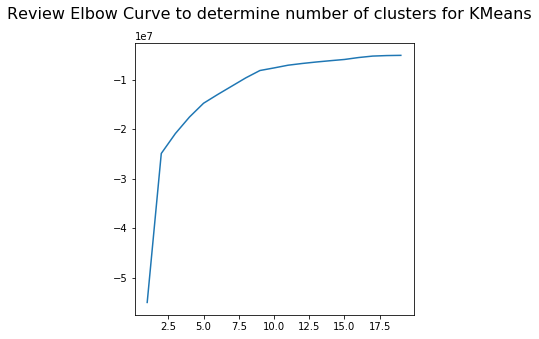

In [71]:
plt.figure(figsize=(5,5))
plt.suptitle('Review Elbow Curve to determine number of clusters for KMeans',
             fontsize=16)
plt.plot(list(clusters), score,alpha = 1)
plt.show()

Lets make **9** clusters out of the data!

In [0]:
n_clusters=9
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
Xkmeans = kmeans.fit_predict(_pca)

In [0]:
sp = model.SalePrice.reset_index(drop=True)
neigh = model.Neighborhood.reset_index(drop=True)

In [0]:
_TSNE = TSNE(n_components=2).fit_transform(_pca)

In [75]:
clusterdf = pd.concat([pd.DataFrame(_TSNE),pd.DataFrame(Xkmeans),
                       pd.DataFrame(sp), pd.DataFrame(neigh)],axis=1)
clusterdf.columns = ['x1','x2','Cluster#','Sale Price','Neighborhood']
clusterdf.head()

,x1,x2,Cluster#,Sale Price,Neighborhood
0,40.490776,-17.798479,1,208500,5
1,-29.860703,8.275785,4,181500,6
2,35.975651,-9.284346,1,223500,5
3,1.825240,-8.166028,4,140000,6
4,29.478197,-2.001261,1,250000,9


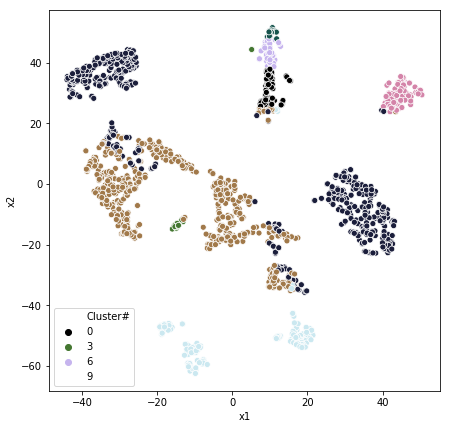

In [76]:
plt.figure(figsize=(7,7))
sb.scatterplot(x="x1", y="x2", hue="Cluster#", palette="cubehelix", data=clusterdf)
plt.show()

In [77]:
clusterdf['Neighborhood'].value_counts(normalize=True) * 100

5    26.616231
3    25.722146
2    17.056396
7     8.390646
8     7.015131
6     5.433287
4     3.370014
9     2.682256
1     2.544704
0     1.169188
Name: Neighborhood, dtype: float64

Looping through the clusters I have listed the top neighbourhoods the houses in each cluster belong to

| Cluster | Topmost Neighborhood |
|-------|-----------------------|
| 0    | Neighborhood 3 (43%)         | 
| 1    | Neighborhood 5 (53%)           | 
| 2     | Neighborhood 5 (43.75%)            | 
| 3    | Neighborhood 3 (62.50%)              | 
| 4    | Neighborhood 3 (45.76%)              | 
| 5     | Neighborhood 3 (26.96%)            | 
| 6    | Neighborhood 3 (47.05%)              | 
| 7    | Neighborhood 8 (17.75%)            | 
| 8    | Neighborhood 5 (33.75%)            | 

Clustering algorithm vizualizations have come out decently.

However Neigborhood's 3 (OldTown,SWISU) and 5 (ClearCr,Crawfor,SawyerW,NWAmes) 

have dominated most of the clusters as they have more than 50% share in the 

entire dataset.

## Part 6 - Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import math

Columns with higher correlation with Sale Price are chosen to participate in 

the prediction process.

In [79]:
model_q6 = model.copy()
model_q6_test = model_test.copy()
labelEncoder = preprocessing.LabelEncoder()

columns = model_q6.select_dtypes(exclude=["number","bool_"]).columns.tolist()
print (columns)
for col in columns:
    value = list(model_q6[col].values.astype(str))+\
    list(model_q6_test[col].values.astype(str))
    labelEncoder.fit(value)
    model_q6[col] = labelEncoder.transform(model_q6[col].astype(str))
    model_q6_test[col] = labelEncoder.transform(model_q6_test[col].astype(str))

['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Heating', 'CentralAir', 'SaleType', 'SaleCondition']


In [80]:
final_model_q6 = model_q6.drop(['Id', 'SalePrice'], axis=1)
final_model_q6_test = model_q6_test.drop(['Id'], axis=1)
colsWithHighCorrelation = []
for col in model_q6.columns:
    cor = model_q6[col].corr(model_q6['SalePrice'])
    if (cor > 0.50 and col != 'SalePrice'):
        colsWithHighCorrelation.append(col)
        print(col + '  ::  ' + str(cor))

Neighborhood  ::  0.7152534390966727
OverallQual  ::  0.7979696022802941
YearBuilt  ::  0.5374933811093713
YearRemodAdd  ::  0.5237382244832677
ExterQual  ::  0.6950363565862349
Foundation  ::  0.5027384104867298
BsmtQual  ::  0.5911803532698491
TotalBsmtSF  ::  0.6060733354112697
1stFlrSF  ::  0.5967371380237595
GrLivArea  ::  0.6931956102812331
FullBath  ::  0.5568459813033136
KitchenQual  ::  0.6668371519730899
TotRmsAbvGrd  ::  0.5348073240356462
FireplaceQu  ::  0.5268960281279927
GarageFinish  ::  0.5443010674253075
GarageCars  ::  0.6498644177488365
GarageArea  ::  0.6324214931888428


In [81]:
for col in colsWithHighCorrelation:
    print('\n\nBuilding Model with ' + col + '\n')
    print('----------------------------------')
    
    train_q, test_q, train_a, test_a =train_test_split(
        final_model_q6[[col]],model_q6['SalePrice'], test_size=0.3)
    reg = LinearRegression()
    reg.fit(train_q,train_a)
    regTest = reg.predict(test_q)
    print("Training Dataset Accuracy = ", reg.score(train_q, train_a))
    print("Testing Accuracy = ", reg.score(test_q, test_a))
    mae = metrics.mean_absolute_error(test_a,regTest)
    mse = metrics.mean_squared_error(test_a,regTest)
    print ("MAE:                ", round(mae))
    print ("RMSE:               ", round(math.sqrt(mse)))



Building Model with Neighborhood

----------------------------------
Training Dataset Accuracy =  0.5161443678234168
Testing Accuracy =  0.49435575388978203
MAE:                 36948.0
RMSE:                50628


Building Model with OverallQual

----------------------------------
Training Dataset Accuracy =  0.64182331717611
Testing Accuracy =  0.6233187483695706
MAE:                 32779.0
RMSE:                45607


Building Model with YearBuilt

----------------------------------
Training Dataset Accuracy =  0.3008143478327716
Testing Accuracy =  0.2499631852252271
MAE:                 43882.0
RMSE:                61565


Building Model with YearRemodAdd

----------------------------------
Training Dataset Accuracy =  0.2598728657562981
Testing Accuracy =  0.2897026557260728
MAE:                 47942.0
RMSE:                69522


Building Model with ExterQual

----------------------------------
Training Dataset Accuracy =  0.4843263699988871
Testing Accuracy =  0.48005040927

Even though the columns themselves are highly correlated, the prediction models

built are weak and do not have good accuracies. **OverallQual** is an exception

and obtains an RMSE of $42772. (Which is way too much)

In [82]:
train_q, test_q, train_a, test_a = train_test_split(
    final_model_q6[colsWithHighCorrelation],
    model_q6['SalePrice'], test_size=0.3)
reg = LinearRegression()
reg.fit(train_q,train_a)
regTest = reg.predict(test_q)
print("Training Dataset Accuracy = ", reg.score(train_q, train_a))
print("Testing Accuracy = ", reg.score(test_q, test_a))
mae = metrics.mean_absolute_error(test_a,regTest)
mse = metrics.mean_squared_error(test_a,regTest)
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))

Training Dataset Accuracy =  0.8029127480512176
Testing Accuracy =  0.8233699922112412
MAE:                 22797.081652627927
RMSE:                34261.14471271415


Combination of the top columns from above gives a better model with a RMSE of

~$27K which is a slight improvement only.

## Part 7 - External Dataset

Looked up for data from https://www.cityofames.org/home

Found a xlsx document at
https://www.cityofames.org/government/departments-divisions-a-h/city-assessor/reports

that contains over 22000 records of housing data in AMES.



In [0]:
amesDataSet = pd.read_excel('/content/drive/My Drive/house-prices-advanced-regression-techniques/Ames Real Estate Data.xlsx')

In [95]:
amesDataSet.shape

(22232, 91)

The data from the sheet can be used to build a model on which the test dataset

can be applied and prediction performance can be improved.

https://locationinc.com/data-catalog/ is a real estate analytics solution that 

performs analysis on FireRisk™, WaterRisk™, HailRisk™, Crime & CrimeRisk™,

Real Estate , Economics and Employment ,Demographics ,Schools

## Part 8 - Permutation Test

The p-value is given by the percentage of runs (randomized) for which the score

obtained is greater than the classification score obtained in the first place.

###  OverallQual  ###
-------------------------------------

Log Root Mean Squared Error : 0.01762932127294381
p-value : 0.009900990099009901


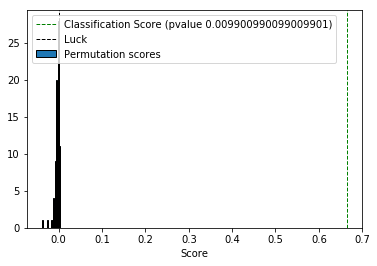

###  BsmtFinSF2  ###
-------------------------------------

Log Root Mean Squared Error : 0.030375597255619093
p-value : 0.297029702970297


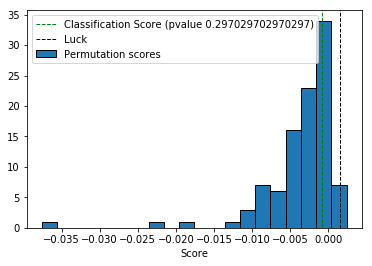

###  MSSubClass  ###
-------------------------------------

Log Root Mean Squared Error : 0.030300141342260684
p-value : 0.009900990099009901


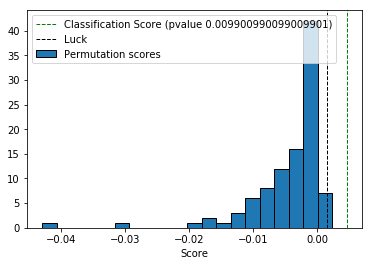

###  HouseStyle  ###
-------------------------------------

Log Root Mean Squared Error : 0.028812891150919874
p-value : 0.009900990099009901


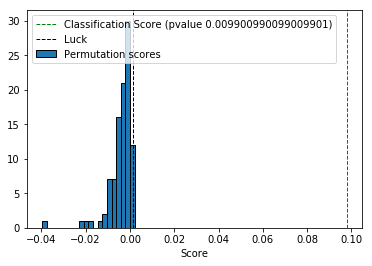

###  YearBuilt  ###
-------------------------------------

Log Root Mean Squared Error : 0.024521866488150326
p-value : 0.009900990099009901


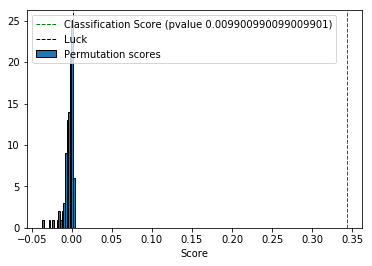

###  OverallCond  ###
-------------------------------------

Log Root Mean Squared Error : 0.030355926790238668
p-value : 0.2079207920792079


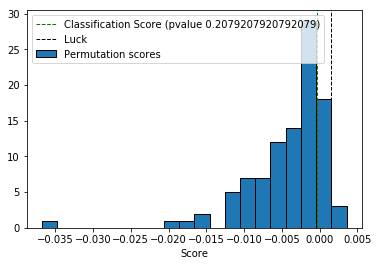

###  ExterCond  ###
-------------------------------------

Log Root Mean Squared Error : 0.030327844932471083
p-value : 0.48514851485148514


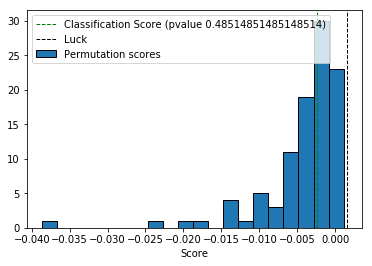

###  3SsnPorch  ###
-------------------------------------

Log Root Mean Squared Error : 0.030321019792423538
p-value : 0.504950495049505


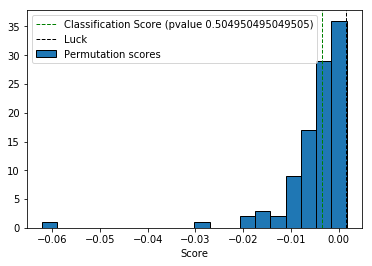

###  YrSold  ###
-------------------------------------

Log Root Mean Squared Error : 0.03035488919659838
p-value : 0.8712871287128713


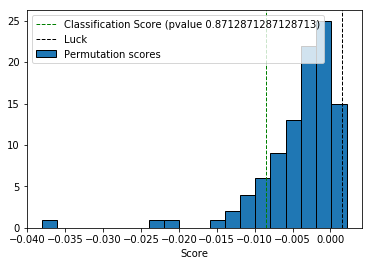

In [97]:
from sklearn.model_selection import permutation_test_score
cols = ['OverallQual','BsmtFinSF2','MSSubClass','HouseStyle','YearBuilt',
        'OverallCond','ExterCond','3SsnPorch','YrSold']
for col in cols: 
  x = pd.DataFrame({'col': final_model_q6[col]})
  y = np.log(model_q6['SalePrice'])
  n_classes =  np.unique(y).size

  train_q, test_q, train_a, test_a = train_test_split(x, y, test_size=0.2,
                                                      random_state=42)

  regressor = LinearRegression()
  regressor.fit(train_q, train_a)
  regTest = regressor.predict(test_q)

  prediction_df = pd.DataFrame({'Actual': test_a, 'Predicted': regTest})
  
  score, permutation_score, p_value = permutation_test_score(
      regressor, x, y, cv=2, n_permutations=100)
  pred = regressor.predict(x)
  print('### ', col, ' ###')
  print('-------------------------------------\n')
  print('Log Root Mean Squared Error :', np.sqrt(
      metrics.mean_squared_log_error(y,pred)))
  print('p-value :', p_value)
  plt.hist(permutation_score, 20, label='Permutation scores',
             edgecolor='black')
  ylim = plt.ylim()
  plt.plot(2 * [score], ylim, '--g', linewidth=1,
             label='Classification Score'
             ' (pvalue %s)' % p_value)
  plt.plot(2 * [1. / n_classes], ylim, '--k', linewidth=1, label='Luck')

  plt.ylim(ylim)
  plt.legend()
  plt.xlabel('Score')
  plt.show()

From the above plots it is clear that columns **OverallQual, MSSubClass,HouseStyle,YearBuilt** 

have good predictive powers and 

columns **BsmtFinSF2, OverallCond, ExterCond, 3SsnPorch, YrSold, EnclosedPorchBin**

do not possess such powers and will not be able to help in predicition.

## Part 9 - Final Result

In [84]:
model_q6 = model.copy()
model_q6_test = model_test.copy()

highCorrCols = ['Exterior1st', 'Exterior2nd', 'BsmtFinType2',
 'BsmtFinType2', 'TotalBsmtSF', '1stFlrSF',
 'GarageCars','GarageArea', 'GarageQual',
 'GarageCond', 'GrLivArea', 'TotRmsAbvGrd',
 'FireplaceQu','Fireplaces']
model_q6 = model_q6.drop(highCorrCols, axis=1)
model_q6_test = model_q6_test.drop(highCorrCols, axis=1)

labelEncoder = preprocessing.LabelEncoder()

columns = model_q6.select_dtypes(exclude=["number","bool_"]).columns.tolist()
print (columns)
for col in columns:
    value = list(model_q6[col].values.astype(str)) + list(
        model_q6_test[col].values.astype(str))
    labelEncoder.fit(value)
    model_q6[col] = labelEncoder.transform(model_q6[col].astype(str))
    model_q6_test[col] = labelEncoder.transform(model_q6_test[col].astype(str))

['RoofStyle', 'RoofMatl', 'Heating', 'CentralAir', 'SaleType', 'SaleCondition']


In [0]:
final_model_q6 = model_q6
final_model_q6_test = model_q6_test

In [0]:
final_model_q6 = model_q6.drop(['Id', 'SalePrice'], axis=1)
final_model_q6_test = model_q6_test.drop(['Id'], axis=1)

In [0]:
from sklearn.model_selection import train_test_split
train_q, test_q, train_a, test_a = train_test_split(
    final_model_q6,model_q6['SalePrice'], test_size=0.3)

In [0]:
#!pip install catboost

In [0]:
#from catboost import CatBoostClassifier

In [0]:
#CatBoostmodel = CatBoostClassifier(iterations=300, 
#                           task_type="GPU",
#                           devices='0:1')
#CatBoostmodel.fit(train_q,
#          train_a,
#          verbose=False)

In [0]:
#CatBoostmodel.fit(train_q,train_a)

In [0]:
#regTest = CatBoostmodel.predict(test_q)

In [0]:
#final_model_q6_test.shape

In [0]:
#test.shape

In [0]:
#finalRegTest = CatBoostmodel.predict(final_model_q6_test)

In [0]:
#submission = pd.DataFrame({'Id':test['Id'], 'SalePrice': finalRegTest[:,0]})

In [0]:
#from google.colab import files
#submission.to_csv('submission.csv')
#files.download('submission.csv')

Kaggle Link: https://www.kaggle.com/rajat994/competitions

Highest Rank: **2083/4844**

Score: RMSE of **0.13317**

Number of entries: **12**

Proof of submission

Kaggle profile link: https://drive.google.com/open?id=1hvbN89zmmGuYfX4WzZihWyPpj0begKqL

Kaggle Submission proof: https://drive.google.com/open?id=1-qdnkU4cAASJrcuNHyBQqqB8-QTOXs0k




## References


https://datascience.stackexchange.com/questions/31746/how-to-include-labels-in-sns-heatmap

https://seaborn.pydata.org/examples/heatmap_annotation.html

https://stackoverflow.com/questions/33779748/set-max-value-for-color-bar-on-seaborn-heatmap

https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/

https://stackoverflow.com/questions/26097916/convert-pandas-series-to-dataframe

https://stackoverflow.com/questions/41509936/append-pandas-series-to-dataframe-as-a-column

https://stackoverflow.com/questions/30482071/how-to-calculate-mean-values-grouped-on-another-column-in-pandas

https://stackoverflow.com/questions/31069191/simple-line-plots-using-seaborn

https://stackoverflow.com/questions/10202570/find-row-where-values-for-column-is-maximal-in-a-pandas-dataframe

https://cmdlinetips.com/2018/04/how-to-drop-one-or-more-columns-in-pandas-dataframe/

https://stackoverflow.com/questions/13851535/delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression-involving

https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas

https://dzone.com/articles/pandas-find-rows-where-columnfield-is-null

https://stackoverflow.com/questions/23748995/pandas-dataframe-column-to-list

https://stackoverflow.com/questions/41969986/how-to-compare-two-values-in-series-not-the-series-objects-python-3-x

https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns

https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot

https://stackoverflow.com/questions/31460146/plotting-value-counts-in-seaborn-barplot

https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type

http://varianceexplained.org/statistics/interpreting-pvalue-histogram/

https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

https://catboost.ai/docs/concepts/python-usages-examples.html

https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203